In [26]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import re
import string
import unicodedata
import plotly_express as px
import plotly.io as pio
from sklearn import preprocessing
import pandas_profiling
import datetime
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import warnings
import math

warnings.filterwarnings("ignore")


In [27]:
df_count_day_type = pd.read_csv('./data_joao/df_count_day_type_modificado.csv',sep=",",parse_dates=['judgmentDate'])
df_count_week_day_type = pd.read_csv('./data_joao/df_count_week_day_type_modificado.csv',sep=",")
df_count_year_month_type = pd.read_csv('./data_joao/df_count_year_month_type_modificado.csv',sep=",")

df_count_day_type.index = pd.to_datetime(df_count_day_type['judgmentDate'])
df_count_year_month_type.index = pd.to_datetime(df_count_year_month_type['yearMonth'])
#df_count_week_day_type.index = pd.to_datetime(df_count_week_day_type['weekDay'])

del df_count_day_type['Unnamed: 0']
del df_count_week_day_type['Unnamed: 0']
del df_count_year_month_type['Unnamed: 0']
del df_count_day_type['judgmentDate']
del df_count_year_month_type['yearMonth']

dataFrames = [df_count_day_type,df_count_week_day_type,df_count_year_month_type]
for df in dataFrames:
    display(df.head(2))
    display(df.index)

,type,count,weekDay,weekType,Dia,Mes,Ano,Feriado
judgmentDate,,,,,,,,
2000-01-03,Agravo de Instrumento,2,0,DiaSemana,3,1,2000,False
2000-01-06,Agravo de Instrumento,1,3,DiaSemana,6,1,2000,False


DatetimeIndex(['2000-01-03', '2000-01-06', '2000-01-10', '2000-01-11',
               '2000-01-20', '2000-01-24', '2000-02-02', '2000-02-06',
               '2000-02-07', '2000-02-08',
               ...
               '2017-12-21', '2017-12-21', '2017-12-27', '2017-12-28',
               '2017-12-28', '2017-12-28', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-29'],
              dtype='datetime64[ns]', name='judgmentDate', length=63765, freq=None)

,weekDay,type,count
0,Sun,Ação Civil Pública,2
1,Sun,Ação Rescisória,9


RangeIndex(start=0, stop=513, step=1)

,type,count
yearMonth,,
2000-01-01,Agravo de Instrumento,12
2000-02-01,Ação Rescisória,1


DatetimeIndex(['2000-01-01', '2000-02-01', '2000-02-01', '2000-02-01',
               '2000-02-01', '2000-02-01', '2000-02-01', '2000-02-01',
               '2000-02-01', '2000-02-01',
               ...
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01', '2017-12-01', '2017-12-01',
               '2017-12-01', '2017-12-01'],
              dtype='datetime64[ns]', name='yearMonth', length=7455, freq=None)

In [28]:
dfGrp = df_count_year_month_type.reset_index().groupby(['type']).agg(total=('count','sum')).sort_values('total',ascending=False)
dfGrp = dfGrp[0:10]
display(dfGrp.head(20))
px.bar(dfGrp.reset_index(), x="type",y='total')

,total
type,
Apelação Cível,1619859
Agravo de Instrumento,1367460
Embargos de Declaração,813282
Recurso Cível,470179
Agravo,420130
Apelação Crime,274843
Apelação e Reexame Necessário,146944
Habeas Corpus,139648
Recurso Especial,59457


In [29]:
pd.set_option("display.max_rows", 999)
dff = pd.merge(df_count_year_month_type.reset_index(),dfGrp,on='type',how='left')
dff.dropna(inplace=True)
display(dff.head(1000))


,yearMonth,type,count,total
0,2000-01-01,Agravo de Instrumento,12,1367460.0
2,2000-02-01,Agravo,4,420130.0
3,2000-02-01,Agravo de Instrumento,35,1367460.0
5,2000-02-01,Apelação Cível,151,1619859.0
6,2000-02-01,Apelação Crime,1,274843.0
...,...,...,...,...
3614,2009-10-01,Recurso Cível,3894,470179.0
3618,2009-10-01,Reexame Necessário,136,47982.0
3625,2009-11-01,Agravo,4246,420130.0
3626,2009-11-01,Agravo de Instrumento,10980,1367460.0


In [30]:
#dff.count()

dff['type'].unique()

array(['Agravo de Instrumento', 'Agravo', 'Apelação Cível',
       'Apelação Crime', 'Apelação e Reexame Necessário',
       'Embargos de Declaração', 'Reexame Necessário', 'Habeas Corpus',
       'Recurso Cível', 'Recurso Especial'], dtype=object)

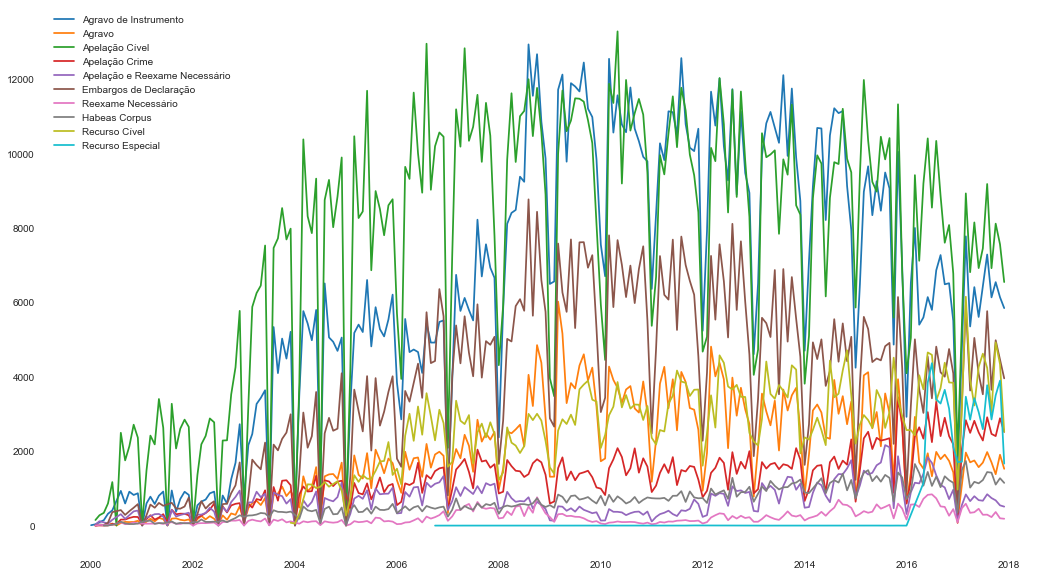

In [31]:
plt.rcParams["figure.figsize"] = (18,10)
for i in dff['type'].unique():
    #print(i)
    graph = df_count_year_month_type[df_count_year_month_type['type']==i].sort_values(by='yearMonth', ascending=True)
    #print(graph.columns)
    plt.plot(graph.index,graph['count'],label=i)

plt.legend(loc="type")
plt.show()    

In [32]:
print(df_count_day_type.columns)
df_count_day_type_top20_year = df_count_day_type[['type','count','Mes']].groupby(['type','Mes']).aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20_year = df_count_day_type_top20_year#.head(100)
display(df_count_day_type_top20_year.head(5))

scatter_plot_top20_year = px.bar(df_count_day_type_top20_year, x="Mes", y="count",color='type')
pio.show(scatter_plot_top20_year)

Index(['type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes', 'Ano', 'Feriado'], dtype='object')


,type,Mes,count
116,Apelação Cível,8,164322
113,Apelação Cível,5,156594
111,Apelação Cível,3,153918
118,Apelação Cível,10,153758
119,Apelação Cível,11,152545


,judgmentDate,count
0,2000-12-31,23.426102
1,2001-12-31,28.331988
2,2002-12-31,34.729339


,judgmentDate,count
0,2000-12-31,27104
1,2001-12-31,49156
2,2002-12-31,67236


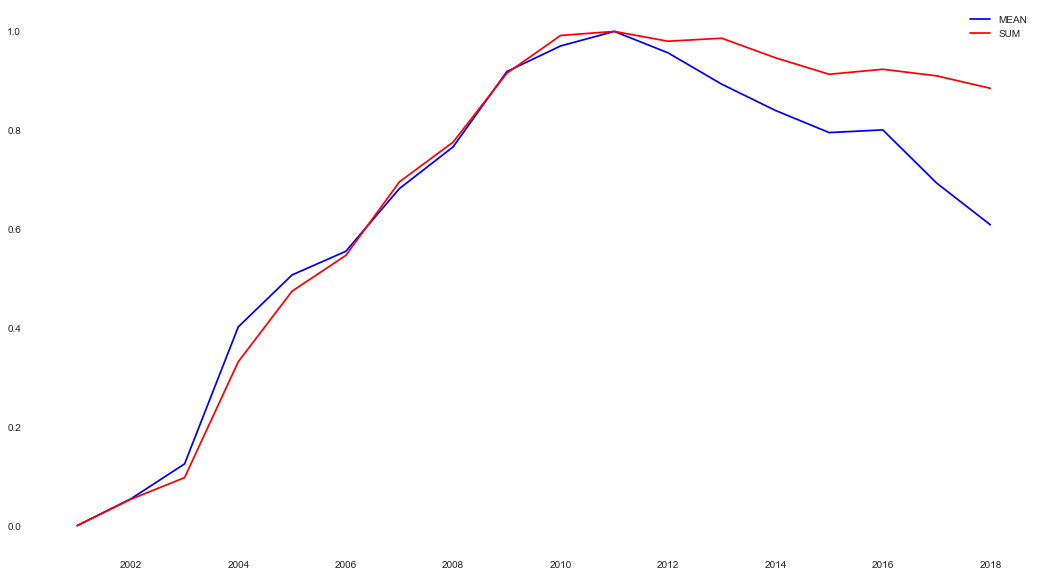

In [33]:
dfMeean = df_count_day_type[['count']].resample('Y').mean().reset_index()
dfSuum = df_count_day_type[['count']].resample('Y').sum().reset_index()

display(dfMeean.head(3))
display(dfSuum.head(3))

dfMeanSum = pd.merge(dfMeean,dfSuum,on='judgmentDate')

dfMeanSum.index = dfMeanSum['judgmentDate']
del dfMeanSum['judgmentDate']

dfMeanSumNorm=(dfMeanSum-dfMeanSum.min())/(dfMeanSum.max()-dfMeanSum.min())
#display(dfMeanSumNorm.head(3))
dfMeanSumNorm = dfMeanSumNorm.reset_index()
#display(dfMeanSumNorm.head(3))

plt.plot(dfMeanSumNorm['judgmentDate'], dfMeanSumNorm['count_x'],'b-',  label='MEAN')
plt.plot(dfMeanSumNorm['judgmentDate'], dfMeanSumNorm['count_y'],'r-',  label='SUM')

plt.legend(loc='best')
plt.show()

In [34]:
#analise de determinado dia 

In [35]:
dfAnalisisByDay = df_count_day_type[['Ano','Dia','Mes','type','count']].reset_index()
del dfAnalisisByDay['judgmentDate']
#dfAnalisisByDay = dfAnalisisByDay[dfAnalisisByDay['type']=='Apelação Cível']
dfAnalisisByDay

,Ano,Dia,Mes,type,count
0,2000,3,1,Agravo de Instrumento,2
1,2000,6,1,Agravo de Instrumento,1
2,2000,10,1,Agravo de Instrumento,2
3,2000,11,1,Agravo de Instrumento,4
4,2000,20,1,Agravo de Instrumento,2
...,...,...,...,...,...
63760,2017,28,12,Embargos de Declaração,1
63761,2017,29,12,Agravo,1
63762,2017,29,12,Agravo de Instrumento,29
63763,2017,29,12,Apelação Cível,3


In [36]:
row=[]
mes=9
dia=14
dfAnoTesteDiaMes = dfAnalisisByDay[(dfAnalisisByDay['Mes']==mes) &(dfAnalisisByDay['Dia']==dia)]
display(dfAnoTesteDiaMes.head(3))
for ano in np.arange(2000,2020):
    for index,item in dfAnoTesteDiaMes.iterrows():
        #print(item.get('Ano'))
        ano = item.get('Ano')
        dia = item.get('Dia')
        mes=item.get('Mes')
        count=item.get('count')
        typee =item.get('type')
        
        row.append({'ano':ano,'mes':mes,'dia':dia,'count':count,'type':typee,'datetime':pd.to_datetime(str(ano)+'-' + str(mes) +'-' + str(dia))})

,Ano,Dia,Mes,type,count
609,2000,14,9,Agravo,15
610,2000,14,9,Agravo de Instrumento,118
611,2000,14,9,Agravo Inominado,1


In [37]:
dfTMDA = pd.DataFrame(row)
dfTMDA.index = pd.to_datetime(dfTMDA['datetime'])
dfTMDA.index

DatetimeIndex(['2000-09-14', '2000-09-14', '2000-09-14', '2000-09-14',
               '2000-09-14', '2000-09-14', '2000-09-14', '2000-09-14',
               '2000-09-14', '2000-09-14',
               ...
               '2017-09-14', '2017-09-14', '2017-09-14', '2017-09-14',
               '2017-09-14', '2017-09-14', '2017-09-14', '2017-09-14',
               '2017-09-14', '2017-09-14'],
              dtype='datetime64[ns]', name='datetime', length=4860, freq=None)

In [38]:
del dfTMDA['datetime']

In [39]:
dfTMDA = dfTMDA = dfTMDA.reset_index()
dfTMDA = dfTMDA.sort_values('datetime')

In [40]:
import plotly.express as px
fig = px.line(dfTMDA[2000:], x='datetime', y='count', color='type')
fig.show()

In [41]:
df_count_day_type[df_count_day_type['count']<1000]

,type,count,weekDay,weekType,Dia,Mes,Ano,Feriado
judgmentDate,,,,,,,,
2000-01-03,Agravo de Instrumento,2,0,DiaSemana,3,1,2000,False
2000-01-06,Agravo de Instrumento,1,3,DiaSemana,6,1,2000,False
2000-01-10,Agravo de Instrumento,2,0,DiaSemana,10,1,2000,False
2000-01-11,Agravo de Instrumento,4,1,DiaSemana,11,1,2000,False
2000-01-20,Agravo de Instrumento,2,3,DiaSemana,20,1,2000,False
...,...,...,...,...,...,...,...,...
2017-12-28,Embargos de Declaração,1,3,DiaSemana,28,12,2017,False
2017-12-29,Agravo,1,4,DiaSemana,29,12,2017,False
2017-12-29,Agravo de Instrumento,29,4,DiaSemana,29,12,2017,False


In [42]:
dfUniqueMore1000= df_count_day_type[df_count_day_type['count']>=1000].reset_index()['type'].unique()

In [43]:
dfUniqueTypes = df_count_day_type['type'].unique()

<div class="alert alert-danger">
    <h1>Não <h3>atingem o teto de mil em nenhum momento</h3></h1>
</div>

In [44]:
for i in dfUniqueTypes:    
    if i not in dfUniqueMore1000:
        print(i)


Apelação e Reexame Necessário
Reexame Necessário
Agravo Regimental
Ação Rescisória
Conflito de Competência
Agravo Interno
Exceção de Suspeição
Mandado de Segurança
Habeas Corpus
Outros Feitos
Impugnação ao Valor da Causa
Medida Cautelar
Medida Cautelar Inominada
Outros Incidentes
Recurso Crime
Recurso em Sentido Estrito
Processo Crime
Recurso de Ofício
Correição Parcial
Conflito de Jurisdição
Agravo Lei
Queixa
Agravo em Execução
Recurso de Agravo
Agravo Inominado
Cautelar Incidental
Desaforamento
Embargos Infringentes
Embargos à Execução
Cautelar Inominada
Carta Testemunhável
Habeas Data
Termo Circunstanciado
Exceção da Verdade
Inquérito Policial
Interpelação Judicial
Exceção de Incompetência
Representação
Pedido de Assistência Judiciária Gratuita
Impugnação à Assistência Judiciária
Restauração de Autos
Declaração de Inconstitucionalidade
Uniformização de Jurisprudência
Mandado de Injunção
Apelação Rec
Notícia Crime
Ação Civil Pública
Apelação Recurso de Ofício
Recurso Oficioso em Sent

<div class="alert alert-danger">
    <h3> Atingem o teto de mil em algum momento
</h3>
</div>

In [45]:
for i in dfUniqueTypes:    
    if i in dfUniqueMore1000:
        print(i)

Agravo de Instrumento
Apelação Cível
Agravo
Embargos de Declaração
Apelação Crime
Recurso Cível
Recurso Especial


In [46]:
dfCountmil = df_count_day_type[['type']][df_count_day_type['count']>=1000].reset_index()
print('Quantidade de dias com dados: '+str(df_count_day_type[['Dia','Mes','Ano']].drop_duplicates().count()['Dia']))

#display(df_count_day_type.tail())
print(f'Quantiade de dias sem dados: {6512-5790} , Quantidade de domingos no período : {6512/7}')

Quantidade de dias com dados: 5790
Quantiade de dias sem dados: 722 , Quantidade de domingos no período : 930.2857142857143


<div class="alert alert-danger">
    <h3> Quantos dias batem no teto (1000)
</h3>
</div>

In [47]:
dfGrpPercent = dfCountmil.groupby('type').count().reset_index()
dfGrpPercent

,type,judgmentDate
0,Agravo,18
1,Agravo de Instrumento,176
2,Apelação Crime,2
3,Apelação Cível,834
4,Embargos de Declaração,177
5,Recurso Cível,91
6,Recurso Especial,1


In [48]:
dfGrpPercent['Porcentagem Dias'] =  dfGrpPercent['judgmentDate'].apply(lambda x: str(round(((x*100)/5790),2))+'%')
dfGrpPercent.columns=['Tipo de processo','Dias acima de mil','% do Total de dias com coleta']
dfGrpPercent

,Tipo de processo,Dias acima de mil,% do Total de dias com coleta
0,Agravo,18,0.31%
1,Agravo de Instrumento,176,3.04%
2,Apelação Crime,2,0.03%
3,Apelação Cível,834,14.4%
4,Embargos de Declaração,177,3.06%
5,Recurso Cível,91,1.57%
6,Recurso Especial,1,0.02%


In [49]:
dfQtdPerDay = df_count_day_type[['Dia','Mes','Ano','weekDay']].drop_duplicates().groupby(['weekDay']).count().reset_index()
dfQtdPerDay['%'] = dfQtdPerDay['Dia'].apply(lambda x: str(round(((x*100)/5790),2))+'%')
dfQtdPerDay[['weekDay','Dia','%']]

,weekDay,Dia,%
0,0,889,15.35%
1,1,904,15.61%
2,2,913,15.77%
3,3,910,15.72%
4,4,872,15.06%
5,5,656,11.33%
6,6,646,11.16%


In [50]:
dfQtdPerDay1 = df_count_day_type[['Dia','Mes','Ano','weekDay','count']].drop_duplicates().groupby(['weekDay']).agg(total=('count','sum')).reset_index()
dfQtdPerDay1['%'] = dfQtdPerDay1['total'].apply(lambda x: str(round(((x*100)/5163874),2))+'%')
dfQtdPerDay1

,weekDay,total,%
0,0,375221,7.27%
1,1,912615,17.67%
2,2,1703708,32.99%
3,3,1761529,34.11%
4,4,395397,7.66%
5,5,7224,0.14%
6,6,8180,0.16%


In [53]:
dfZERADO = df_count_day_type.resample('D').sum()

In [103]:
dfZeradoDiaMes = dfZERADO[dfZERADO['count']<=5]
dfZeradoDiaMes['mes'] = dfZeradoDiaMes.index.month
dfZeradoDiaMes['dia'] = dfZeradoDiaMes.index.day
dfDayLowResult = dfZeradoDiaMes.groupby(['mes','dia']).count().sort_values(by='Feriado',ascending=False)
dfDayLowResult = dfDayLowResult[dfDayLowResult['Feriado']>=11].reset_index()
dfDayLowResult

,mes,dia,count,weekDay,Dia,Mes,Ano,Feriado
0,1,1,17,17,17,17,17,17
1,12,25,14,14,14,14,14,14
2,12,31,14,14,14,14,14,14
3,9,20,13,13,13,13,13,13
4,2,2,13,13,13,13,13,13
5,5,1,13,13,13,13,13,13
6,12,24,12,12,12,12,12,12
7,9,7,12,12,12,12,12,12
